In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look cleaner
sns.set()

In [3]:
# Load Dataset

df = pd.read_csv("fraudTest.csv")

# Display first 5 rows
df.head()

,sn,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21-06-2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19-03-1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21-06-2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17-01-1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21-06-2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21-10-1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21-06-2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25-07-1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21-06-2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06-07-1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:
# Check all values
print(df.isna())

           sn  trans_date_trans_time  cc_num  merchant  category    amt  \
0       False                  False   False     False     False  False   
1       False                  False   False     False     False  False   
2       False                  False   False     False     False  False   
3       False                  False   False     False     False  False   
4       False                  False   False     False     False  False   
...       ...                    ...     ...       ...       ...    ...   
555714  False                  False   False     False     False  False   
555715  False                  False   False     False     False  False   
555716  False                  False   False     False     False  False   
555717  False                  False   False     False     False  False   
555718  False                  False   False     False     False  False   

        first   last  gender  street  ...    lat   long  city_pop    job  \
0       False  False   

In [5]:
print(df.isna().sum())

sn                       0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [6]:
# checking duplicate rows
df.duplicated()[df.duplicated()==True]

Series([], dtype: bool)

In [7]:
# finding number of rows and columns

print("Shape (rows, columns): ", df.shape,"\n")

print("number of rows: ", df.shape[0])
print("number of columns: ", df.shape[1])

Shape (rows, columns):  (555719, 23) 

number of rows:  555719
number of columns:  23


In [8]:
# viewing the data types of columns
df.dtypes

sn                         int64
trans_date_trans_time        str
cc_num                   float64
merchant                     str
category                     str
amt                      float64
first                        str
last                         str
gender                       str
street                       str
city                         str
state                        str
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                          str
dob                          str
trans_num                    str
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [9]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df.dtypes

C:\Users\kemo7\AppData\Local\Temp\ipykernel_16892\1967565742.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])


sn                                int64
trans_date_trans_time    datetime64[us]
cc_num                          float64
merchant                            str
category                            str
amt                             float64
first                               str
last                                str
gender                              str
street                              str
city                                str
state                               str
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                                 str
dob                                 str
trans_num                           str
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
dtype: object

In [10]:
# Statistical summary
df.describe(include='all')

,sn,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,555719,5.557190e+05,555719,555719,555719.000000,555719,555719,555719,555719,...,555719.000000,555719.000000,5.557190e+05,555719,555719,555719,5.557190e+05,555719.000000,555719.000000,555719.000000
unique,NaN,NaN,NaN,693,14,NaN,341,471,2,924,...,NaN,NaN,NaN,478,910,555719,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,fraud_Kilback LLC,gas_transport,NaN,Christopher,Smith,F,444 Robert Mews,...,NaN,NaN,NaN,Film/video editor,23-03-1977,2da90c7d74bd46a0caf3777415b3ebd3,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1859,56370,NaN,11443,12146,304886,1474,...,NaN,NaN,NaN,4119,2408,1,NaN,NaN,NaN,NaN
mean,277859.000000,2020-10-02 01:53:55.673389,4.178387e+17,NaN,NaN,69.392810,NaN,NaN,NaN,NaN,...,38.543253,-90.231325,8.822189e+04,NaN,NaN,NaN,1.380679e+09,38.542798,-90.231380,0.003860
min,0.000000,2020-06-21 12:14:00,6.041621e+10,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,20.027100,-165.672300,2.300000e+01,NaN,NaN,NaN,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,2020-08-09 06:10:00,1.800430e+14,NaN,NaN,9.630000,NaN,NaN,NaN,NaN,...,34.668900,-96.798000,7.410000e+02,NaN,NaN,NaN,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,2020-10-03 00:59:00,3.521420e+15,NaN,NaN,47.290000,NaN,NaN,NaN,NaN,...,39.371600,-87.476900,2.408000e+03,NaN,NaN,NaN,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,2020-12-01 03:02:30,4.635330e+15,NaN,NaN,83.010000,NaN,NaN,NaN,NaN,...,41.894800,-80.175200,1.968500e+04,NaN,NaN,NaN,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,2020-12-31 23:59:00,4.992350e+18,NaN,NaN,22768.110000,NaN,NaN,NaN,NaN,...,65.689900,-67.950300,2.906700e+06,NaN,NaN,NaN,1.388534e+09,66.679297,-66.952026,1.000000


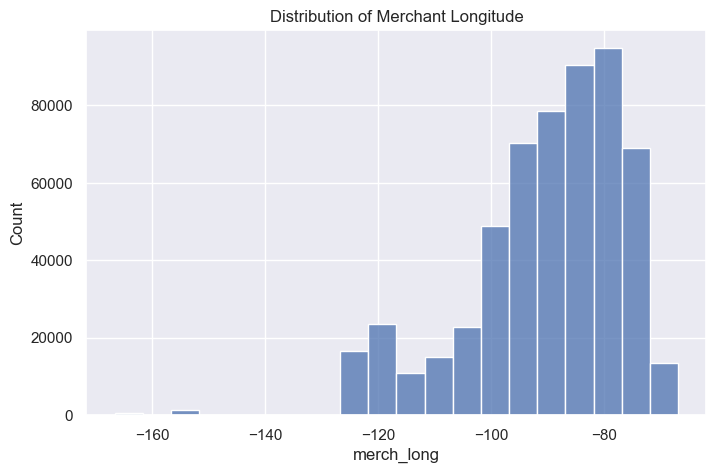

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df['merch_long'], bins=20)
plt.title("Distribution of Merchant Longitude")
plt.show()

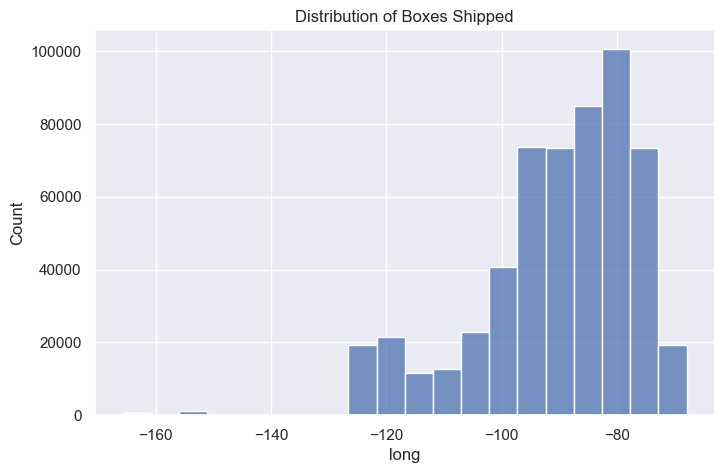

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(df['long'], bins=20)
plt.title("Distribution of Boxes Shipped")
plt.show()

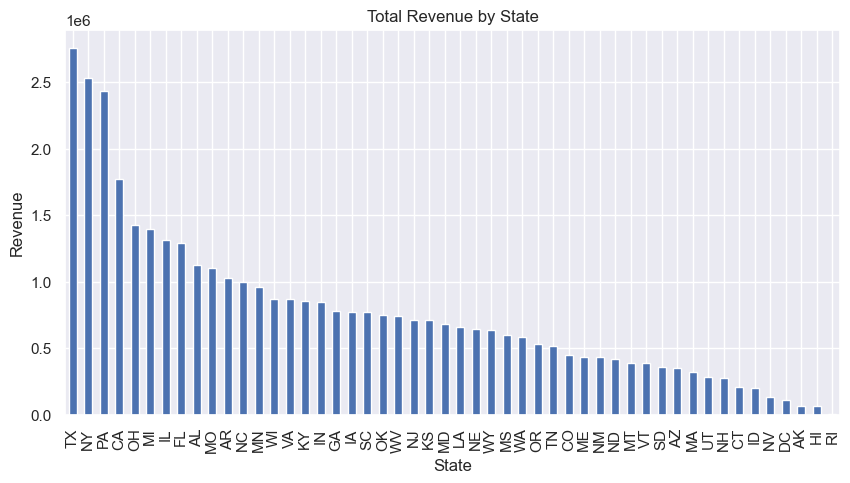

state
TX    2756497.24
NY    2529741.65
PA    2434619.31
CA    1768791.26
OH    1427389.97
MI    1399976.96
IL    1309975.89
FL    1293183.50
AL    1127922.81
MO    1100293.98
AR    1027950.44
NC    1000257.31
MN     958127.38
WI     873762.57
VA     868156.17
KY     856554.04
IN     846750.31
GA     780302.43
IA     770590.61
SC     769101.76
OK     748404.90
WV     745815.56
NJ     713518.34
KS     711303.48
MD     681750.67
LA     660432.25
NE     644839.24
WY     635544.76
MS     599533.28
WA     586232.31
OR     530045.43
TN     514060.15
CO     447073.46
ME     433931.40
NM     432206.50
ND     419204.52
MT     391608.59
VT     388414.99
SD     362452.69
AZ     347901.59
MA     324452.99
UT     286190.19
NH     277038.04
CT     205176.90
ID     197705.27
NV     131077.59
DC     108781.32
AK      66071.94
HI      64858.25
RI       7330.92
Name: amt, dtype: float64

In [13]:
state_revenue = df.groupby('state')['amt'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
state_revenue.plot(kind='bar')

plt.title("Total Revenue by State")
plt.ylabel("Revenue")
plt.xlabel("State")

plt.show()

state_revenue


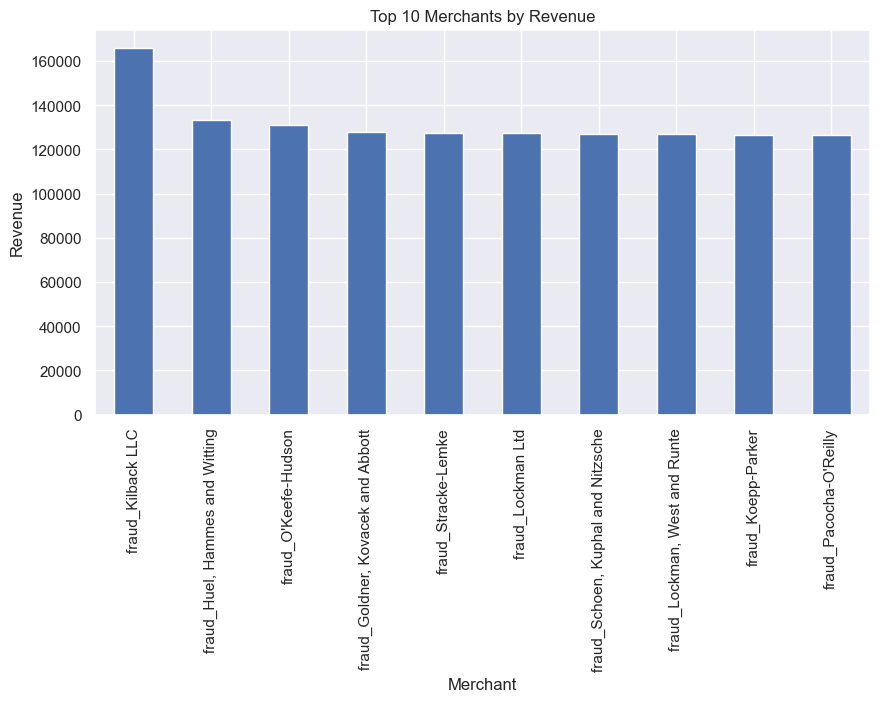

merchant
fraud_Kilback LLC                    165980.47
fraud_Huel, Hammes and Witting       133149.68
fraud_O'Keefe-Hudson                 130940.88
fraud_Goldner, Kovacek and Abbott    128002.23
fraud_Stracke-Lemke                  127392.85
fraud_Lockman Ltd                    127335.44
fraud_Schoen, Kuphal and Nitzsche    127134.44
fraud_Lockman, West and Runte        127015.28
fraud_Koepp-Parker                   126572.99
fraud_Pacocha-O'Reilly               126505.98
Name: amt, dtype: float64

In [14]:
merchant_revenue = df.groupby('merchant')['amt'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
merchant_revenue.head(10).plot(kind='bar')

plt.title("Top 10 Merchants by Revenue")
plt.ylabel("Revenue")
plt.xlabel("Merchant")

plt.show()

merchant_revenue.head(10)


In [15]:
merchant_revenue = df.groupby('merchant')['amt'].sum().sort_values(ascending=False)

merchant_revenue.head(10)


merchant
fraud_Kilback LLC                    165980.47
fraud_Huel, Hammes and Witting       133149.68
fraud_O'Keefe-Hudson                 130940.88
fraud_Goldner, Kovacek and Abbott    128002.23
fraud_Stracke-Lemke                  127392.85
fraud_Lockman Ltd                    127335.44
fraud_Schoen, Kuphal and Nitzsche    127134.44
fraud_Lockman, West and Runte        127015.28
fraud_Koepp-Parker                   126572.99
fraud_Pacocha-O'Reilly               126505.98
Name: amt, dtype: float64

C:\Users\kemo7\AppData\Local\Temp\ipykernel_16892\600043094.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['age'] = 2024 - pd.to_datetime(df['dob']).dt.year


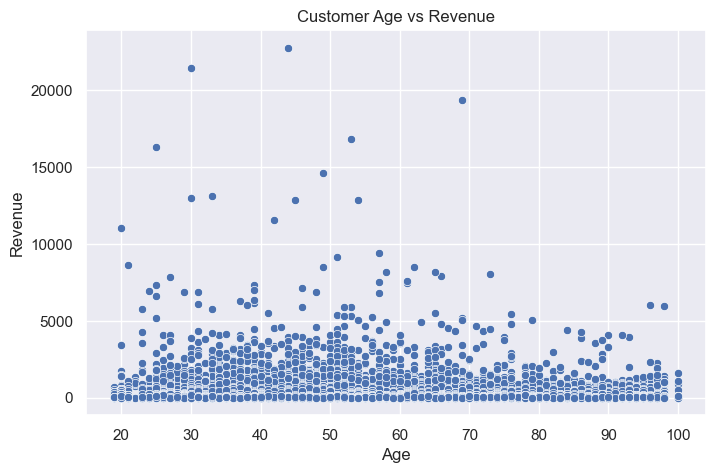

In [18]:
df['age'] = 2024 - pd.to_datetime(df['dob']).dt.year

plt.figure(figsize=(8,5))

sns.scatterplot(x='age', y='amt', data=df)

plt.title("Customer Age vs Revenue")
plt.xlabel("Age")
plt.ylabel("Revenue")

plt.show()


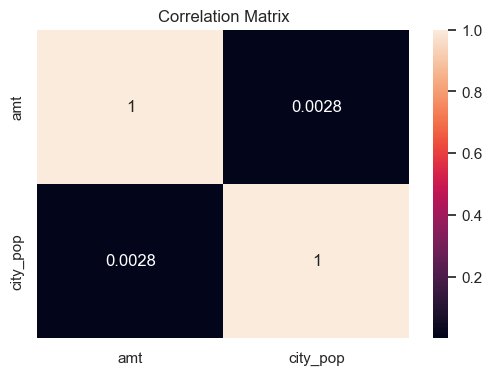

In [19]:
plt.figure(figsize=(6,4))

sns.heatmap(df[['amt', 'city_pop']].corr(), annot=True)

plt.title("Correlation Matrix")
plt.show()


In [20]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])


In [21]:
df['Month'] = df['trans_date_trans_time'].dt.to_period('M')


In [22]:
monthly_revenue = df.groupby('Month')['amt'].sum()


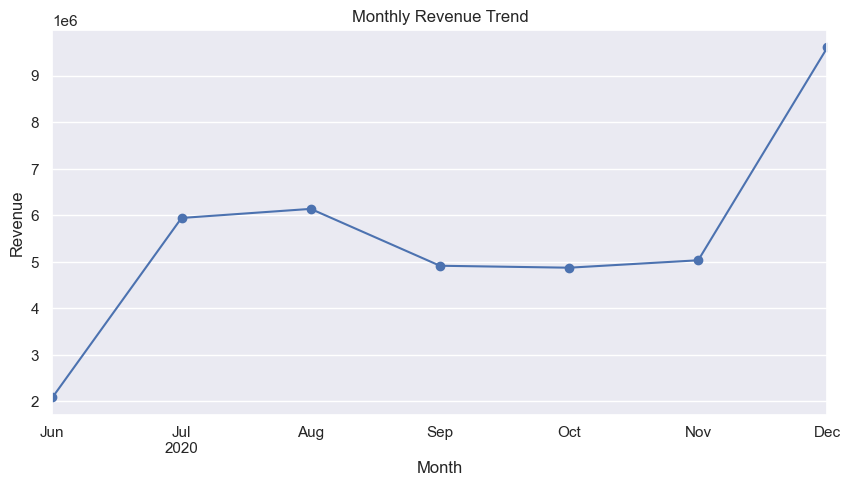

In [23]:
plt.figure(figsize=(10,5))

monthly_revenue.plot(marker='o')

plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue")
plt.xlabel("Month")

plt.xticks(rotation=45)

plt.show()
